In [13]:
import pandas as pd
import numpy as np
import time

# Define the Telugu movies
telugu_movies = [
    {"MovieID": 1, "MovieName": "Baahubali: The Beginning"},
    {"MovieID": 2, "MovieName": "Baahubali 2: The Conclusion"},
    {"MovieID": 3, "MovieName": "Ala Vaikunthapurramuloo"},
    {"MovieID": 4, "MovieName": "Arjun Reddy"},
    {"MovieID": 5, "MovieName": "Sarileru Neekevvaru"},
    {"MovieID": 6, "MovieName": "Maharshi"},
    {"MovieID": 7, "MovieName": "Fidaa"},
    {"MovieID": 8, "MovieName": "Sye Raa Narasimha Reddy"},
    {"MovieID": 9, "MovieName": "Rangasthalam"},
    {"MovieID": 10, "MovieName": "Geetha Govindam"}
]

# Define the number of users and ratings
num_users = 30
num_ratings = 100

# Create random ratings data
ratings_data = {
    'MovieID': np.random.randint(1, 11, num_ratings),
    'UserID': np.random.randint(1, num_users + 1, num_ratings),
    'Rating': np.random.randint(1, 6, num_ratings),
    'Timestamp': np.random.randint(1, int(time.time()), num_ratings)
}

# Convert to DataFrame
ratings_df = pd.DataFrame(ratings_data)

# Convert the movies list to a DataFrame
movies_df = pd.DataFrame(telugu_movies)

# Merge the movie names into the ratings data
dataset = pd.merge(ratings_df, movies_df, on='MovieID')


In [14]:
from pyspark.sql import SparkSession

# Create a Spark session
spark = SparkSession.builder.appName("TeluguMovieRatingsAnalysis").getOrCreate()

# Convert the Pandas DataFrame to a PySpark DataFrame
spark_df = spark.createDataFrame(dataset)


In [15]:
from pyspark.sql.functions import from_unixtime, col

# Convert the Unix timestamp to a readable date format
spark_df = spark_df.withColumn("Date", from_unixtime(col("Timestamp")))


In [16]:
# Group the DataFrame by MovieID and calculate the average rating for each movie
avg_ratings = spark_df.groupBy("MovieID", "MovieName").avg("Rating").withColumnRenamed("avg(Rating)", "AverageRating")

# Display the average ratings
avg_ratings.show()


+-------+--------------------+------------------+
|MovieID|           MovieName|     AverageRating|
+-------+--------------------+------------------+
|      1|Baahubali: The Be...|3.0833333333333335|
|      5| Sarileru Neekevvaru| 3.090909090909091|
|      7|               Fidaa|               2.9|
|      2|Baahubali 2: The ...|2.7857142857142856|
|      9|        Rangasthalam| 3.142857142857143|
|      8|Sye Raa Narasimha...| 2.888888888888889|
|      4|         Arjun Reddy|3.4444444444444446|
|     10|     Geetha Govindam|               2.5|
|      6|            Maharshi| 3.272727272727273|
|      3|Ala Vaikunthapurr...|2.7777777777777777|
+-------+--------------------+------------------+



In [19]:
# Group the DataFrame by UserID and count the number of ratings each user has made
user_ratings_count = spark_df.groupBy("UserID").count().filter(col("count") > 5)

# Display the users who have rated more than 5 movies
user_ratings_count.show()


+------+-----+
|UserID|count|
+------+-----+
|    29|    7|
|    27|    8|
|    11|    6|
+------+-----+



In [20]:
# Order the average ratings in descending order and get the top 5 movies
top_5_movies = avg_ratings.orderBy(col("AverageRating").desc()).limit(5)

# Display the top 5 highest-rated movies
top_5_movies.show()


+-------+--------------------+------------------+
|MovieID|           MovieName|     AverageRating|
+-------+--------------------+------------------+
|      4|         Arjun Reddy|3.4444444444444446|
|      6|            Maharshi| 3.272727272727273|
|      9|        Rangasthalam| 3.142857142857143|
|      5| Sarileru Neekevvaru| 3.090909090909091|
|      1|Baahubali: The Be...|3.0833333333333335|
+-------+--------------------+------------------+



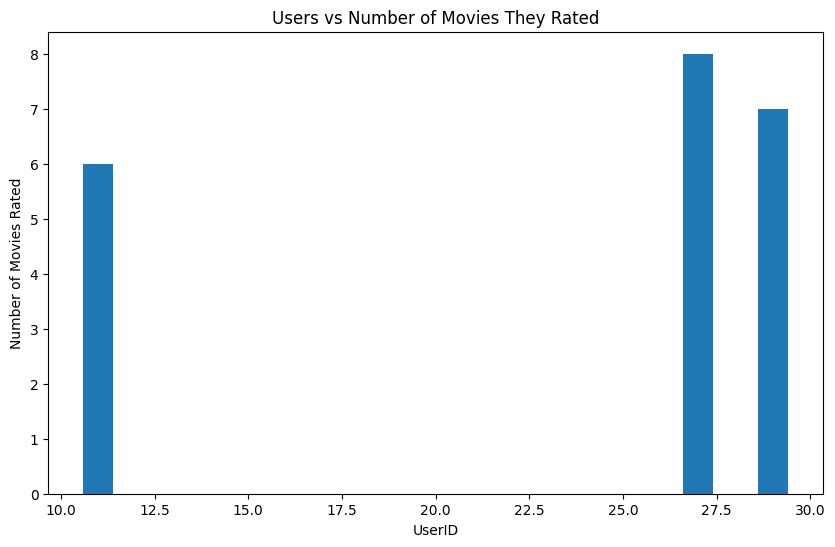

In [21]:
import matplotlib.pyplot as plt

# Convert the PySpark DataFrame to a Pandas DataFrame for visualization
user_ratings_pandas = user_ratings_count.toPandas()

# Create a bar plot for the number of movies rated by each user
plt.figure(figsize=(10, 6))
plt.bar(user_ratings_pandas['UserID'], user_ratings_pandas['count'])
plt.xlabel('UserID')
plt.ylabel('Number of Movies Rated')
plt.title('Users vs Number of Movies They Rated')
plt.show()
